##라이브러리 설정 

In [ ]:
import tensorflow as tf
import cv2
import json
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


import cv2
import json
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import sys
import dlib
from skimage import io

from PIL import Image ,ImageDraw

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
# image = load_img("/content/마리오 가브라노비치.png",  target_size= (768, 1024))

## 얼굴 디텍팅 방법 1 - Face_recognition

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=cfd4e622d7a08bf24ef2ab4bbc0f8e67922d6675f878e46c27f4c2dcd1a8247e
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [ ]:
import face_recognition

image = face_recognition.load_image_file("/content/마리오 가브라노비치 1.png")
face_locations = face_recognition.face_locations(image, model="cnn")

In [ ]:
face_locations

###얼굴 부위 찾기

In [ ]:
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

### 눈코입찾기 

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()

### 화장시키기 

In [ ]:
pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    pil_image.show()

## 얼굴 디텍팅 방법 2 - mediapipe

In [ ]:
import mediapipe as mp
import math

In [ ]:
#이미지 로드 resize 방법  

DESIRED_HEIGHT = 160
DESIRED_WIDTH = 160
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  return img

In [ ]:
image = cv2.imread("우리가 원하는 이미지 ")

In [ ]:
img = resize_and_show(image)

In [ ]:
#얼굴 찾기 위한 함수 정의 툴에 내장되어있는 함수 사용하는거 
mp_face_detection = mp.solutions.face_detection # 얼굴 인식 함수디텍터 지정하기 

mp_drawing = mp.solutions.drawing_utils  # 사진에 그림그려주는 툴 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1) #그림 설정 -> 두께 , 지름 

In [ ]:
# Run MediaPipe Face Detection with short range model.

# 해당 툴 실행방법 
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.

    if not results.detections: #얼굴을 만약 인식못하면 표현할 부분 . 
      print("no")
    annotated_image = img.copy() #기존에 resize했던 툴가지고 오기 . 
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

In [ ]:
#위에서 디텍팅한 부분 프린트하기
#리스트안에 키포인트가 있는데 왼쪽 눈썹 오른쪽 눈썹 눈눈 귀귀 등등으로 있음. 
for i in results.detections:
    keypoints = i.location_data.relative_keypoints
    print(keypoints)



### 3D 메쉬 방법론 

In [ ]:
# 얼굴 디텍터 툴 가지고오고 
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
# 드로잉 해주는 함수랑 sttle 설정 
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    if not results.multi_face_landmarks: #못찾으면 나오는데 이거 지정해야할듯. 
        print("no")
    annotated_image = img.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

In [ ]:
#이거 하면 얼굴 점 478개나옴. 좌표 상대좌표여서 
#x,y 에 image의 h,w 곱해야 실제 픽셀위치 나옴. 
results.multi_face_landmarks[0].landmark

In [ ]:
# h, w, _= img.shape
# h, w

In [ ]:
import numpy as np

In [ ]:
# for i in results.multi_face_landmarks[0].landmark:
#     arr[int(i.y * h)][int(i.x * w)] = 255


In [ ]:
# plt.imshow(arr, cmap = 'gray')
# plt.show()

In [ ]:
#### 기존 사진 channel에 합치는거 
# arr = arr.reshape(480,480,1)
# temp = np.concatenate((img, arr), axis = 2)
# temp.shape

In [ ]:
## 총괄하는 함수 만들기. 

def total_procc(path):
    cnt = 0
    image = cv2.imread(path)
    img = resize_and_show(image)
    # 얼굴 디텍터 툴 가지고오고 
    mp_face_mesh = mp.solutions.face_mesh

    h, w = 160, 160
    arr = np.zeros((h,w))
    image_data = np.zeros((h,w))
    # Run MediaPipe Face Mesh.
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        refine_landmarks=True,
        max_num_faces=2,
        min_detection_confidence=0.5) as face_mesh:
    
        # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
        results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Draw face landmarks of each face.
        if not results.multi_face_landmarks: #못찾으면 나오는데 이거 지정해야할듯. 
            cnt += 1

        else:

            for i in results.multi_face_landmarks[0].landmark:
                if i.y*h < 160 and i.x*w < 160:
                    arr[int(i.y * h)][int(i.x * w)] = 255

                else:
                    print(f"{path} has no face")

    return arr

#  할거 
1. 위에 mash points 만으로 이미지 만들어서 모델태워서 확인 //best ^^ 
    
2. 기존 사진 ( 224,224,3) 여기에 위에 mash point 사진 채널에 concat하기 -> (224,224,4) 해서 모델태우기 
3. 기존 같은 구조의 모델에 RGB사진 태우고, mash사진 따로태우고 flatten layer 직전에 channel로 concat해서 dense 태우기 . 

In [ ]:
target_size = (160,160)

In [ ]:
import os

In [ ]:
#gdrive mount . 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 저장할 위치 만드는 함수 .
# !mkdir -p /content/drive/MyDrive/Landmark
# !mkdir -p /content/drive/MyDrive/Landmark/Suc
# !mkdir -p /content/drive/MyDrive/Landmark/Fail
!mkdir -p /content/drive/MyDrive/Landmark_ch1

In [ ]:
# 성공한 사진들 가지고 오기 . 
suc_ = os.listdir("/content/drive/MyDrive/CV/Suc")

# 실패한 사진들 가지고 오기 
fail_ = os.listdir("/content/drive/MyDrive/CV/Fail")

In [ ]:
DESIRED_HEIGHT_1 = 96
DESIRED_WIDTH_2 = 96
def resize_and_show_1(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH_2, math.floor(h/(w/DESIRED_WIDTH_2))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT_1)), DESIRED_HEIGHT_1))
  return img

In [ ]:
temp_img = []
temp_arr = []
label = [] 
for i in tqdm(range(len(suc_))):
    path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
    # arr = total_procc(path)
    # temp_arr.append(arr)

    img = load_img(path, target_size=target_size, color_mode = 'grayscale')
    img = img_to_array(img)
    temp_img.append(img)
    
    label.append(1)
    

  0%|          | 0/910 [00:00<?, ?it/s]

In [ ]:
for j in tqdm(range(len(fail_))):
    path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
    # arr = total_procc(path)

    # temp_arr.append(arr)

    img = load_img(path, target_size=target_size, color_mode = 'grayscale')
    img = img_to_array(img)
    temp_img.append(img)
    
    label.append(0)


  0%|          | 0/699 [00:00<?, ?it/s]

In [ ]:
len(temp_img), len(label)

(1609, 1609)

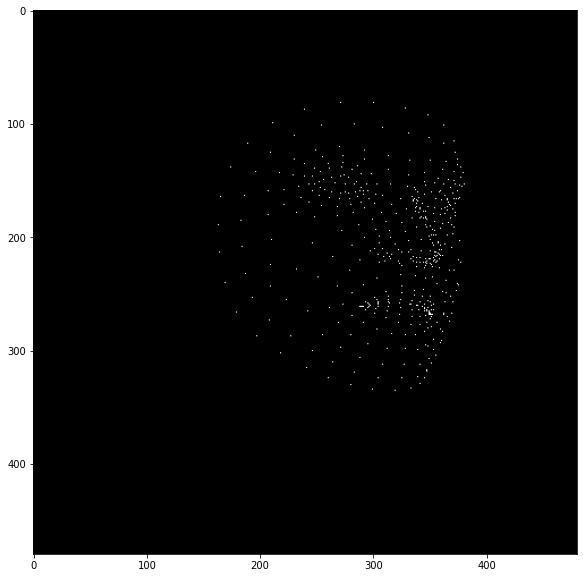

In [ ]:
plt.figure(figsize =(10,10))
plt.imshow(temp_arr[30], cmap = 'gray')

In [ ]:
import pandas as pd
import pickle

In [ ]:
df = pd.DataFrame({"img" : temp_img, "label": label})
df

,img,label
0,"[[[35.0], [35.0], [36.0], [36.0], [36.0], [36....",1
1,"[[[41.0], [42.0], [42.0], [44.0], [46.0], [47....",1
2,"[[[43.0], [45.0], [38.0], [37.0], [30.0], [29....",1
3,"[[[127.0], [128.0], [127.0], [126.0], [126.0],...",1
4,"[[[80.0], [82.0], [84.0], [86.0], [88.0], [90....",1
...,...,...
1604,"[[[30.0], [30.0], [30.0], [30.0], [30.0], [30....",0
1605,"[[[55.0], [54.0], [54.0], [53.0], [53.0], [52....",0
1606,"[[[190.0], [190.0], [190.0], [190.0], [189.0],...",0
1607,"[[[56.0], [56.0], [56.0], [56.0], [56.0], [56....",0


In [ ]:
df.to_pickle("/content/drive/MyDrive/Landmark_ch1/grey_scale_img_160.pickle")